In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder as le
from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score 



In [112]:
data = pd.read_csv(r"C:\Users\KIIT\Desktop\ExcelR Data science\Assignments\MLR\ToyotaCorolla - MLR.csv")
data.head(-5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1426,9950,78,30964,Petrol,110,1,1600,3,4,4,1080
1427,8950,71,29000,Petrol,86,1,1300,3,4,5,1045
1428,8450,72,26000,Petrol,86,0,1300,3,4,5,1015
1429,8950,78,24000,Petrol,86,1,1300,5,4,5,1065


<h1>Exploratory data analysis</h1>

In [113]:
print(data.shape )


(1436, 11)


In [114]:
print(data.dtypes)

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [115]:
print(data.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [116]:
#checking for missing values

data.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

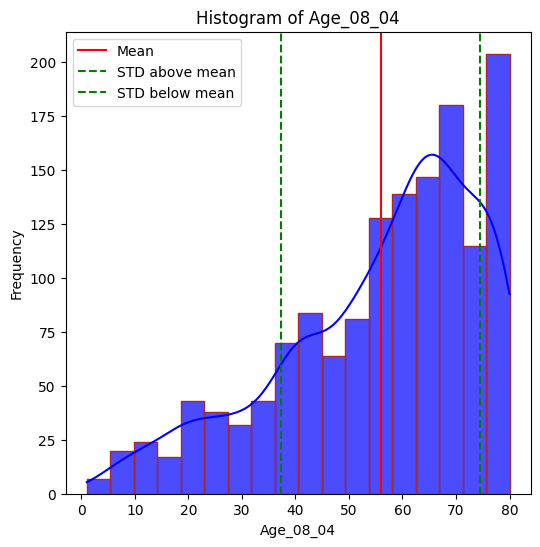

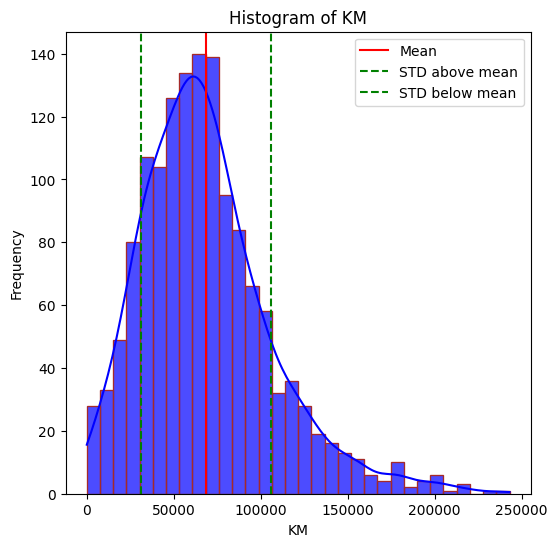

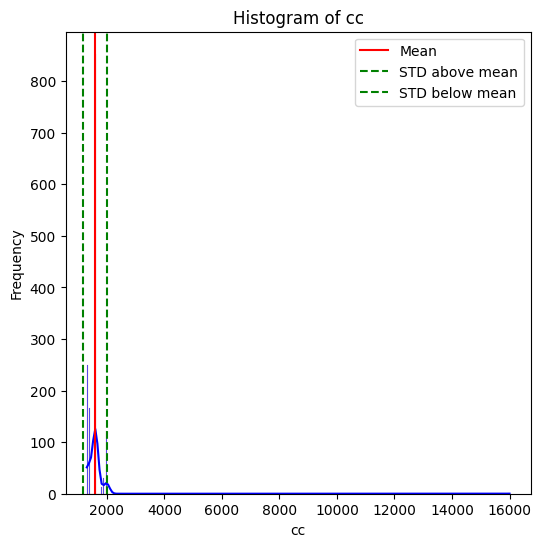

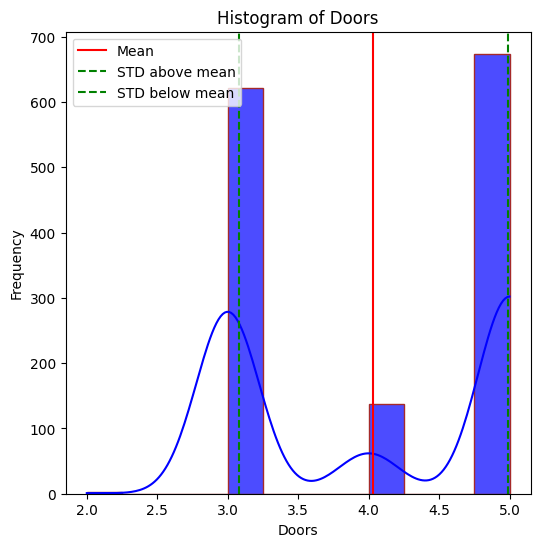

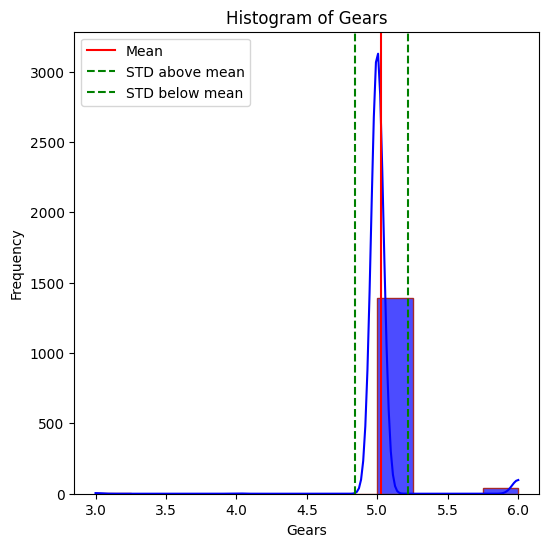

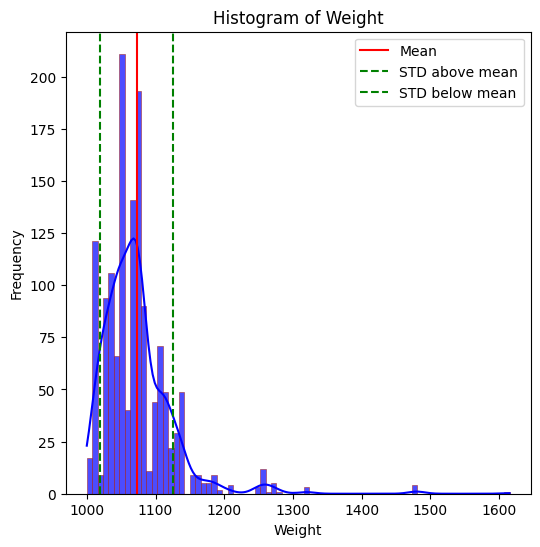

In [117]:
columns = [ 'Age_08_04', 'KM', 'cc' , 'Doors',  'Gears', 'Weight'   ]

for i in columns:
    mean = data[i].mean() 
    std = data[i].std()
    plt.figure(figsize=(6,6))
    sns.histplot(data = data, x = i, kde = True, color = 'Blue', alpha = 0.7, edgecolor = "brown" )
    plt.axvline(x = mean, color = "red", linestyle = '-', label = 'Mean')
    plt.axvline(x = mean+std, color = "green", linestyle="--", label = "STD above mean")
    plt.axvline(x = mean - std, color = "green", linestyle = "--", label = "STD below mean")
    plt.title(f"Histogram of {i}")
    plt.xlabel(f"{i}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

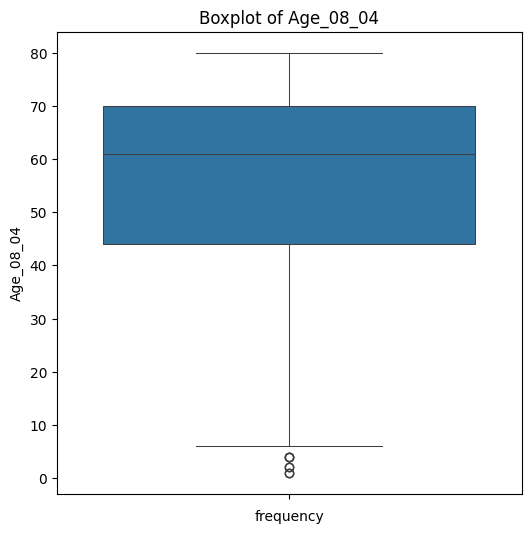

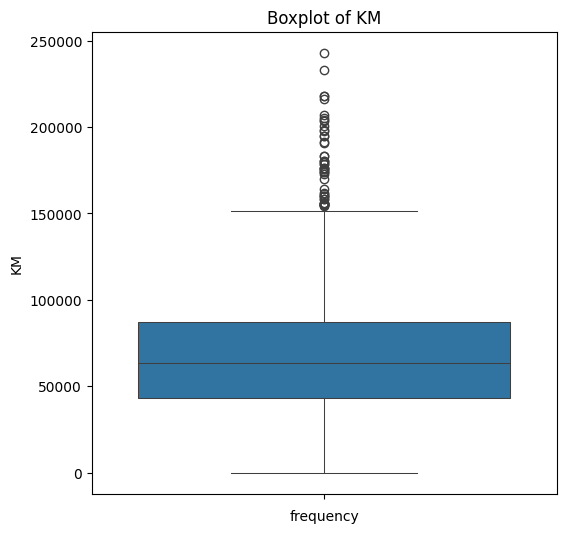

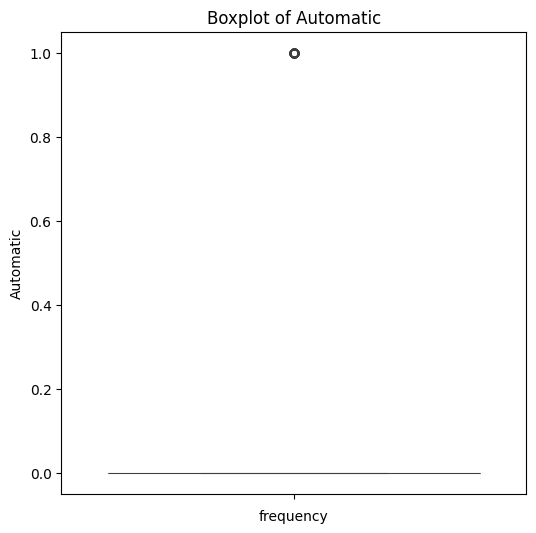

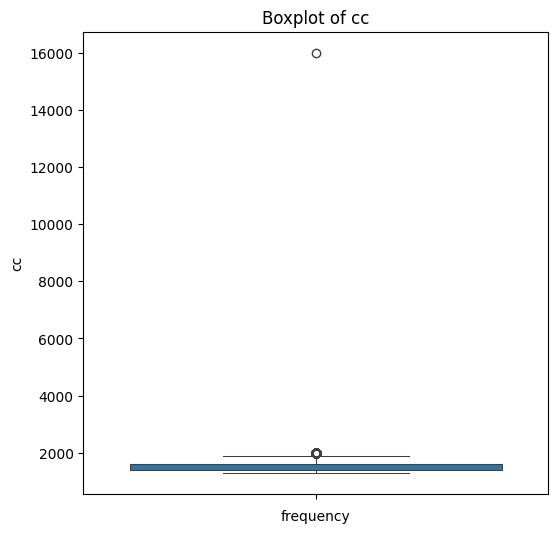

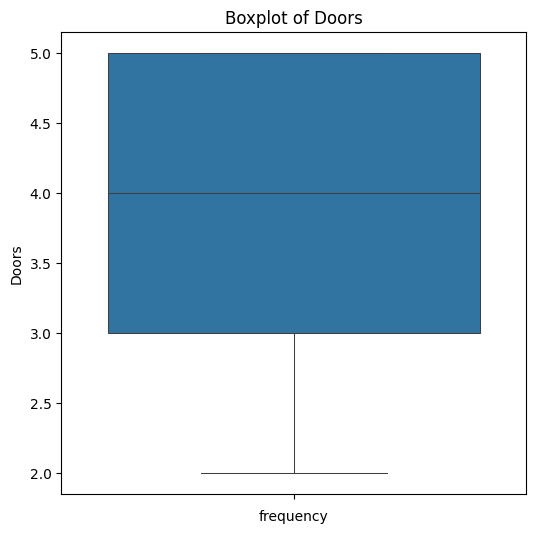

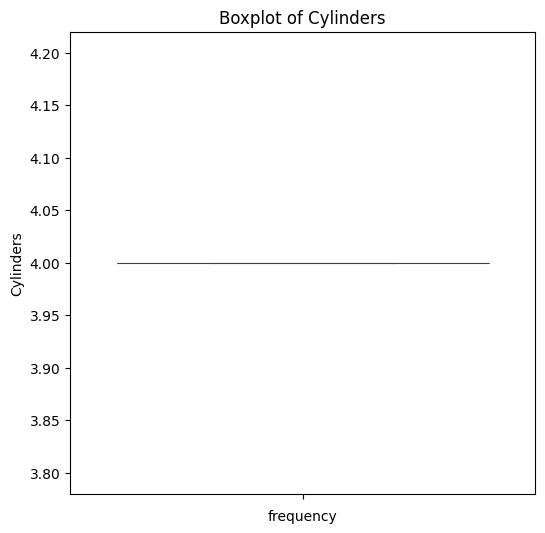

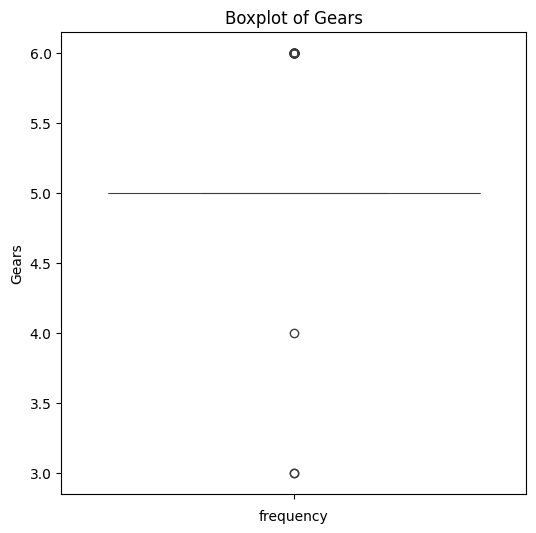

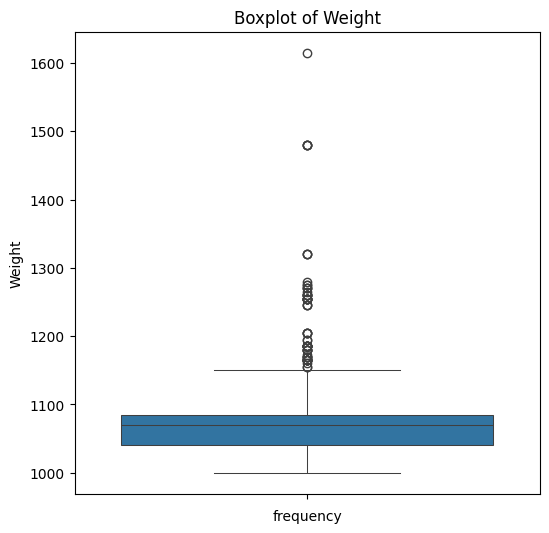

In [118]:
column1 = [ 'Age_08_04', 'KM', 'Automatic' , 'cc' , 'Doors', 'Cylinders' , 'Gears', 'Weight'   ]

#detecting outliers in each varible 
for i in column1: 
    plt.figure(figsize=(6,6))
    sns.color_palette = 'deep'
    sns.boxplot(data = data, y = i, linewidth=0.75)
    plt.title(f"Boxplot of {i}")
    plt.xlabel("frequency")
    plt.ylabel(f"{i}")
    plt.show()


__From the box plot we can find that there are outliers in "weight", "KM" and "Age" variables__

In [119]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [120]:
encoder = le()
data['Fuel_Type_encoded']  =  encoder.fit_transform(data['Fuel_Type'])


In [121]:
fuel_type_map = dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
print(fuel_type_map)


{'CNG': 0, 'Diesel': 1, 'Petrol': 2}


In [122]:
columns_to_exclude = ['Fuel_Type']
correlation = data.drop(columns = columns_to_exclude).corr()
print(correlation)

                      Price  Age_08_04        KM        HP  Automatic  \
Price              1.000000  -0.876590 -0.569960  0.314990   0.033081   
Age_08_04         -0.876590   1.000000  0.505672 -0.156622   0.031717   
KM                -0.569960   0.505672  1.000000 -0.333538  -0.081854   
HP                 0.314990  -0.156622 -0.333538  1.000000   0.013144   
Automatic          0.033081   0.031717 -0.081854  0.013144   1.000000   
cc                 0.126389  -0.098084  0.102683  0.035856   0.066740   
Doors              0.185326  -0.148359 -0.036197  0.092424  -0.027654   
Cylinders               NaN        NaN       NaN       NaN        NaN   
Gears              0.063104  -0.005364  0.015023  0.209477  -0.098555   
Weight             0.581198  -0.470253 -0.028598  0.089614   0.057249   
Fuel_Type_encoded -0.022157   0.080261 -0.420586  0.409476   0.069718   

                         cc     Doors  Cylinders     Gears    Weight  \
Price              0.126389  0.185326        NaN  0

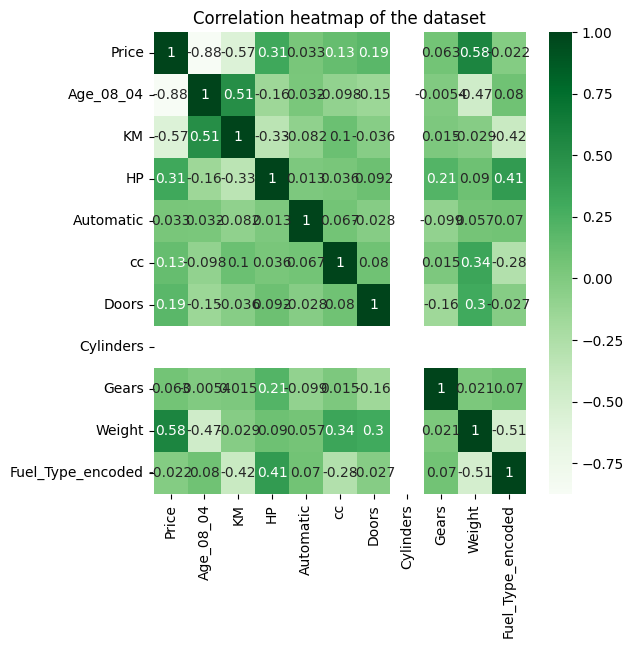

In [123]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cmap='Greens', annot = True )
plt.title("Correlation heatmap of the dataset")
plt.show()

__From the correlation matrix we observe that the *Target* variable Price is Highly correlated with ["Age", " KM ",  " HP ", " Weight "]__

<h3>handling multicollinearity</h3>


In [124]:
column2 = [ 'Age_08_04', 'KM', 'Automatic' , 'cc' , 'Doors', 'Cylinders' , 'Gears', 'Weight', 'Fuel_Type_encoded'   ]

df = data[column2]
vif_data = pd.DataFrame() 
vif_data['Feature'] = column2
vif_data['VIF'] = [vif(df.values, i) for i in range(df.shape[1])]

print(vif_data)


             Feature          VIF
0          Age_08_04     1.915827
1                 KM     1.920002
2          Automatic     1.059641
3                 cc     1.157552
4              Doors     1.185787
5          Cylinders  1671.172474
6              Gears     1.072907
7             Weight     2.154517
8  Fuel_Type_encoded     1.947551


__From the above we can conclude that cylinder has the highest multicollinearity__

__Before removing it we will treat the outliers first and then check both correlation and multicollinearity__

<h2>Outlier detection and treatment</h2>

__From the boxplot we concluded that there is significant number of outliers in "Weight", "KM","Age". lets try some advance outlier detection technique and check for outliers__ 

n_neighbors=5, Number of Outliers: 127
n_neighbors=6, Number of Outliers: 102
n_neighbors=7, Number of Outliers: 79
n_neighbors=8, Number of Outliers: 54
n_neighbors=9, Number of Outliers: 45
n_neighbors=10, Number of Outliers: 26
n_neighbors=11, Number of Outliers: 14
n_neighbors=12, Number of Outliers: 10
n_neighbors=13, Number of Outliers: 6
n_neighbors=14, Number of Outliers: 7
n_neighbors=15, Number of Outliers: 5
n_neighbors=16, Number of Outliers: 3
n_neighbors=17, Number of Outliers: 3
n_neighbors=18, Number of Outliers: 2
n_neighbors=19, Number of Outliers: 2
n_neighbors=20, Number of Outliers: 3


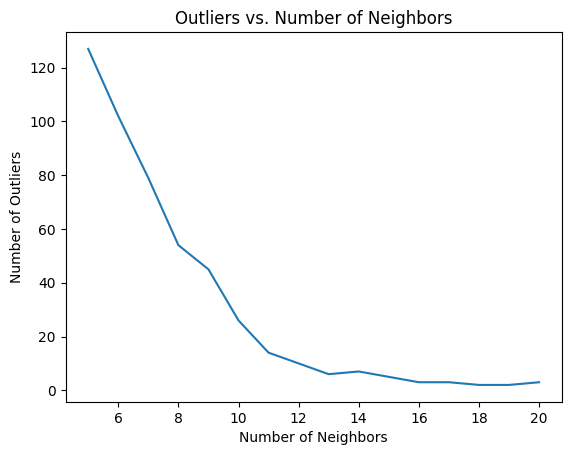

In [125]:
#LOF factor for outliers detection 
outlier_count = []
outlier_column = ['Weight','KM','Age_08_04']
X = data[outlier_column]
n_neighbors = range(5,21)

for i in n_neighbors:
    lof = LOF(n_neighbors = i)
    outliers_score = lof.fit_predict(X)
    outliers = X[outliers_score == -1]
    outlier_count.append(len(outliers))    
    print(f"n_neighbors={i}, Number of Outliers: {len(outliers)}")
plt.plot(n_neighbors, outlier_count)
plt.xlabel('Number of Neighbors')
plt.ylabel('Number of Outliers')
plt.title('Outliers vs. Number of Neighbors')
plt.show()

      

__Taking n neighbours as 11 with 14 outliers as this provides a balanace and the algorithm can also learn from these outliers__


In [126]:
columns_to_include = [col for col in data.columns if col not in columns_to_exclude]
X = data[columns_to_include]


In [127]:
lof = LOF(n_neighbors=11, contamination='auto')
X = data[outlier_column]
outlier_predictions = lof.fit_predict(X)
outlier_indices = X.index[outlier_predictions == -1]
outlier_rows = data.loc[outlier_indices]
print(outlier_rows)

      Price  Age_08_04      KM Fuel_Type   HP  Automatic    cc  Doors  \
186    6950         43  243000    Diesel   69          0  1900      3   
221   12450         44   74172    Petrol  110          0  1600      5   
237   13950         35   59500    Diesel   69          0  1900      3   
321   10750         36   36269    Petrol  110          0  1600      5   
566   10995         55   36406    Petrol  110          0  1600      4   
571   11500         52   35823    Petrol  110          0  1600      5   
746    8250         66   81250    Petrol  110          0  1600      3   
747   10950         65   81192    Petrol  110          0  1600      3   
748    8950         61   81170    Petrol  110          0  1600      4   
899    9500         62   59295    Petrol   86          0  1300      5   
1015  10950         62   35512    Petrol  110          0  1600      3   
1044   5900         73  232940    Diesel   72          0  2000      5   
1359   8750         80   59326    Petrol  110      

In [128]:
#Removing outliers 
data.drop(outlier_indices, inplace=True)
data.reset_index(drop=True, inplace=True)

In [129]:
print(f"Number of outliers detected: {len(outlier_indices)}")
print(f"Dataset without outliers shape: {data.shape}")


Number of outliers detected: 14
Dataset without outliers shape: (1422, 12)


In [130]:
#Final preprocessed dataset
data.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_encoded
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,1
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,1
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,1
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,1
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,1


# This final preprocessedd feature engineered dataset is used to build 3 different models
<h3>MODEL 1</h3>
  
  - This model will consist of all the variables including those that have very low correlation
<h3>Model 2 </h3>

  - This model will consis of all the variables that contribute the most to the dataset, that have higher weightage

<h3>MODEL 3</h3>
 
  - A hybrid model that will capture linear relationships, non - linear relationships , categorical variable and nteraction Term (Interaction term combines the effect of two variables on the target variables )
  - *Linear variables:* AGE, Kilometer, Weight
  - *Non - Linear variables* - AGE squared, LOG of KM
  - *Interaction Term:* - AGE and weight combined 
  - *Categorical variable* - Fuel Type 


In [156]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_encoded,Age_weight,log(KM),Age_square
0,13500,23,46986,Diesel,90,0,2000,3,5,1165,1,26795,10.757605,529
1,13750,23,72937,Diesel,90,0,2000,3,5,1165,1,26795,11.197351,529
2,13950,24,41711,Diesel,90,0,2000,3,5,1165,1,27960,10.638520,576
3,14950,26,48000,Diesel,90,0,2000,3,5,1165,1,30290,10.778956,676
4,13750,30,38500,Diesel,90,0,2000,3,5,1170,1,35100,10.558414,900


In [161]:
#Splitting the dataset into train and test
#data.drop('Fuel_Type', axis=1, inplace=True)
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [164]:
#MODEL 1
Model = LinearRegression()
Model.fit(X_train, y_train)
prediction = Model.predict(X_test)

model1_r2 = r2_score(y_test, prediction)
model1_mse = metrics.mean_squared_error(y_test, prediction)
model1_rmse = np.sqrt(model1_mse)
model1_MAE = metrics.mean_absolute_error(y_test, prediction)
model1_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction)

print(f"R2 score: {model1_r2}")
print(f"MSE: {model1_mse}")
print(f"RMSE: {model1_rmse}")
print(f"MAE: {model1_MAE}")
print(f"MAPE: {model1_MAPE}")



R2 score: 0.9086814518496954
MSE: 1182726.9305117154
RMSE: 1087.5324963014739
MAE: 834.3424819528094
MAPE: 0.08293243194477005


In [165]:
#MODEL 2
high_correlation_column = ['Age_08_04', 'KM', 'HP', 'Weight']

X2 = data[high_correlation_column]

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)
Model.fit(X2_train, y_train)
prediction2 = Model.predict(X2_test)

model2_r2 = r2_score(y_test, prediction2)
model2_MSE = metrics.mean_squared_error(y_test, prediction2)
model2_RMSE = np.sqrt(model2_MSE)
model2_MAE = metrics.mean_absolute_error(y_test, prediction2)
model2_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction2)

print(f"R2 score: {model2_r2}")
print(f"MSE: {model2_MSE}")
print(f"RMSE: {model2_RMSE}")
print(f"MAE: {model2_MAE}")
print(f"MAPE: {model2_MAPE}")

R2 score: 0.8823092956079638
MSE: 1524290.1729695352
RMSE: 1234.621469507774
MAE: 958.6565446371989
MAPE: 0.09454167449953112


In [166]:
# Model 3 (HYBRID MODEL)
data['Age_weight'] = data['Age_08_04'] * data['Weight']
data['log(KM)'] = data['KM'].apply(np.log)
data['Age_square'] = data['Age_08_04'] ** 2


X3 = data[['Age_08_04', 'KM', 'HP', 'Weight', 'Age_weight', 'log(KM)', 'Age_square', 'Fuel_Type_encoded']]

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 42)

Model.fit(X3_train, y_train)
prediction3 = Model.predict(X3_test)

model3_r2 = r2_score(y_test, prediction3)
model3_MSE = metrics.mean_squared_error(y_test, prediction3)
model3_RMSE = np.sqrt(model3_MSE)
model3_MAE = metrics.mean_absolute_error(y_test, prediction3)
model3_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction3)

print(f"R2 score: {model3_r2}")
print(f"MSE: {model3_MSE}")
print(f"RMSE: {model3_RMSE}")
print(f"MAE: {model3_MAE}")
print(f"MAPE: {model3_MAPE}")


R2 score: 0.9075201634086679
MSE: 1197767.545382579
RMSE: 1094.425669190274
MAE: 829.8079530934219
MAPE: 0.0827437618506052


In [167]:
#Visualising the metrics of three model 
models = ['Model 1', 'Model 2', 'Model 3']

r2_scores = [model1_r2, model2_r2, model3_r2]

mse_scores = [model1_mse, model2_MSE, model3_MSE]

rmse_scores = [model1_rmse, model2_RMSE, model3_RMSE]

mae_scores = [model1_MAE, model2_MAE, model3_MAE]

mape_scores = [model1_MAPE, model2_MAPE, model3_MAPE]

metrics_df = pd.DataFrame({'Model': models, 'R2 Score': r2_scores, 'MSE': mse_scores, 'RMSE': rmse_scores, 'MAE': mae_scores, 'MAPE': mape_scores})
metrics_df


,Model,R2 Score,MSE,RMSE,MAE,MAPE
0,Model 1,0.908681,1.182727e+06,1087.532496,834.342482,0.082932
1,Model 2,0.882309,1.524290e+06,1234.621470,958.656545,0.094542
2,Model 3,0.907520,1.197768e+06,1094.425669,829.807953,0.082744


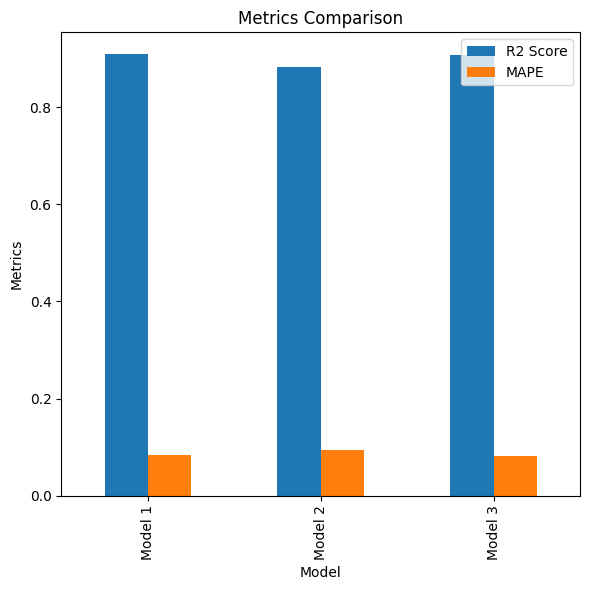

In [168]:
#Stacked bar chart
fig, ax = plt.subplots(figsize=(6, 6))

metrics_df.plot(kind='bar', x='Model', y=['R2 Score', 'MAPE'], ax=ax)

ax.set_xlabel('Model')
ax.set_ylabel('Metrics')
ax.set_title('Metrics Comparison')

ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

__From the above R2 comparison we can find that Model 1 is perfoming slightly better than the rest of the models wqith a R2 score of approximately 90.86%__

Now lets apply __Lasso and Ridge methods__ on the model.

In [169]:
#Lasso and Ridge Regression Model 1
rr = Ridge(alpha=0.3)
rr.fit(X_train, y_train)
prediction_rr = rr.predict(X_test)

lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
prediction_lasso = lasso.predict(X_test)


rr1_r2 = r2_score(y_test, prediction_rr)
rr1_MSE = metrics.mean_squared_error(y_test, prediction_rr)
rr1_RMSE = np.sqrt(rr1_MSE)
rr1_MAE = metrics.mean_absolute_error(y_test, prediction_rr)
rr1_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction_rr)

lasso1_r2 = r2_score(y_test, prediction_lasso)
lasso1_MSE = metrics.mean_squared_error(y_test, prediction_lasso)
lasso1_RMSE = np.sqrt(lasso1_MSE)
lasso1_MAE = metrics.mean_absolute_error(y_test, prediction_lasso)
lasso1_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction_lasso)

print(f"R2 score for Ridge Regression: {rr1_r2}")
print(f"MSE for Ridge Regression: {rr1_MSE}")
print(f"RMSE for Ridge Regression: {rr1_RMSE}")
print(f"MAE for Ridge Regression: {rr1_MAE}")
print(f"MAPE for Ridge Regression: {rr1_MAPE}\n\n")

print(f"R2 score for Lasso Regression: {lasso1_r2}")
print(f"MSE for Lasso Regression: {lasso1_MSE}")
print(f"RMSE for Lasso Regression: {lasso1_RMSE}")
print(f"MAE for Lasso Regression: {lasso1_MAE}")
print(f"MAPE for Lasso Regression: {lasso1_MAPE}")

R2 score for Ridge Regression: 0.9087164475227261
MSE for Ridge Regression: 1182273.6783982825
RMSE for Ridge Regression: 1087.324090783554
MAE for Ridge Regression: 834.1579824039476
MAPE for Ridge Regression: 0.08291498028050175


R2 score for Lasso Regression: 0.908986183559469
MSE for Lasso Regression: 1178780.1485377306
RMSE for Lasso Regression: 1085.7164217868913
MAE for Lasso Regression: 831.6098244122724
MAPE for Lasso Regression: 0.08268220021277659


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.685e+08, tolerance: 1.511e+06
  model = cd_fast.enet_coordinate_descent(


In [170]:
#Lasso and Ridge Regression Model 2
rr.fit(X2_train, y_train)
prediction_rr2 = rr.predict(X2_test)

lasso.fit(X2_train, y_train)
prediction_lasso2 = lasso.predict(X2_test)


rr2_r2 = r2_score(y_test, prediction_rr2)
rr2_MSE = metrics.mean_squared_error(y_test, prediction_rr2)
rr2_RMSE = np.sqrt(rr_MSE)
rr2_MAE = metrics.mean_absolute_error(y_test, prediction_rr2)
rr2_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction_rr2)

lasso2_r2 = r2_score(y_test, prediction_lasso2)
lasso2_MSE = metrics.mean_squared_error(y_test, prediction_lasso2)
lasso2_RMSE = np.sqrt(lasso2_MSE)
lasso2_MAE = metrics.mean_absolute_error(y_test, prediction_lasso2)
lasso2_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction_lasso2)

print(f"R2 score for Ridge Regression: {rr2_r2}")
print(f"MSE for Ridge Regression: {rr2_MSE}")
print(f"RMSE for Ridge Regression: {rr2_RMSE}")
print(f"MAE for Ridge Regression: {rr2_MAE}")
print(f"MAPE for Ridge Regression: {rr2_MAPE}\n\n")

print(f"R2 score for Lasso Regression: {lasso2_r2}")
print(f"MSE for Lasso Regression: {lasso2_MSE}")
print(f"RMSE for Lasso Regression: {lasso2_MAE}")
print(f"MAPE for Lasso Regression: {lasso2_MAPE}")

R2 score for Ridge Regression: 0.8823093163033905
MSE for Ridge Regression: 1524289.9049293722
RMSE for Ridge Regression: 1094.2631558134672
MAE for Ridge Regression: 958.6564444361053
MAPE for Ridge Regression: 0.09454166061303895


R2 score for Lasso Regression: 0.882309378023774
MSE for Lasso Regression: 1524289.105547854
RMSE for Lasso Regression: 958.6548904158582
MAPE for Lasso Regression: 0.09454139088826691


In [171]:
#Lasso and Ridge Regression Model 2
rr.fit(X3_train, y_train)
prediction_rr3 = rr.predict(X3_test)

lasso.fit(X3_train, y_train)
prediction_lasso3 = lasso.predict(X3_test)


rr3_r2 = r2_score(y_test, prediction_rr3)
rr3_MSE = metrics.mean_squared_error(y_test, prediction_rr3)
rr3_RMSE = np.sqrt(rr3_MSE)
rr3_MAE = metrics.mean_absolute_error(y_test, prediction_rr3)
rr3_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction_rr3)

lasso3_r2 = r2_score(y_test, prediction_lasso3)
lasso3_MSE = metrics.mean_squared_error(y_test, prediction_lasso3)
lasso3_RMSE = np.sqrt(lasso3_MSE)
lasso3_MAE = metrics.mean_absolute_error(y_test, prediction_lasso3)
lasso3_MAPE = metrics.mean_absolute_percentage_error(y_test, prediction_lasso3)

print(f"R2 score for Ridge Regression: {rr3_r2}")
print(f"MSE for Ridge Regression: {rr3_MSE}")
print(f"RMSE for Ridge Regression: {rr3_RMSE}")
print(f"MAE for Ridge Regression: {rr3_MAE}")
print(f"MAPE for Ridge Regression: {rr3_MAPE}\n\n")

print(f"R2 score for Lasso Regression: {lasso3_r2}")
print(f"MSE for Lasso Regression: {lasso3_MSE}")
print(f"RMSE for Lasso Regression: {lasso3_RMSE}")
print(f"MAE for Lasso Regression: {lasso3_MAE}")
print(f"MAPE for Lasso Regression: {lasso3_MAPE}")

R2 score for Ridge Regression: 0.9075476263878284
MSE for Ridge Regression: 1197411.8541708481
RMSE for Ridge Regression: 1094.2631558134672
MAE for Ridge Regression: 829.687961090232
MAPE for Ridge Regression: 0.08273111709479337


R2 score for Lasso Regression: 0.9080317528253747
MSE for Lasso Regression: 1191141.6123956903
RMSE for Lasso Regression: 1091.3943432122462
MAE for Lasso Regression: 826.6382036681248
MAPE for Lasso Regression: 0.08244872345815679


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.831e+08, tolerance: 1.511e+06
  model = cd_fast.enet_coordinate_descent(


In [172]:
#visualing lasso and ridge for all models

r2_scores = [rr1_r2, rr2_r2, rr3_r2]

mse_scores = [rr1_MSE, rr2_MSE, rr3_MSE]

rmse_scores = [rr1_RMSE, rr2_RMSE, rr3_RMSE]

mae_scores = [rr1_MAE, rr2_MAE, rr3_MAE]

mape_scores = [rr1_MAPE, rr2_MAPE, rr3_MAPE]

metrics_df_ridge = pd.DataFrame({'Model': models, 'R2 Score': r2_scores, 'MSE': mse_scores, 'RMSE': rmse_scores, 'MAE': mae_scores, 'MAPE': mape_scores})
metrics_df


,Model,R2 Score,MSE,RMSE,MAE,MAPE
0,Model 1,0.908681,1.182727e+06,1087.532496,834.342482,0.082932
1,Model 2,0.882309,1.524290e+06,1234.621470,958.656545,0.094542
2,Model 3,0.907520,1.197768e+06,1094.425669,829.807953,0.082744


In [173]:
#visualing lasso and ridge for all models

r2_scores = [lasso1_r2, lasso2_r2, lasso3_r2]


mse_scores = [lasso1_MSE, lasso2_MSE, lasso2_MSE]

rmse_scores = [lasso1_RMSE, lasso2_RMSE, lasso2_RMSE]

mae_scores = [lasso1_MAE, lasso2_MAE, lasso2_MAE]

mape_scores = [lasso1_MAPE, lasso2_MAPE, lasso2_MAPE]

metrics_df_lasso = pd.DataFrame({'Model': models, 'R2 Score': r2_scores, 'MSE': mse_scores, 'RMSE': rmse_scores, 'MAE': mae_scores, 'MAPE': mape_scores})
metrics_df

,Model,R2 Score,MSE,RMSE,MAE,MAPE
0,Model 1,0.908681,1.182727e+06,1087.532496,834.342482,0.082932
1,Model 2,0.882309,1.524290e+06,1234.621470,958.656545,0.094542
2,Model 3,0.907520,1.197768e+06,1094.425669,829.807953,0.082744


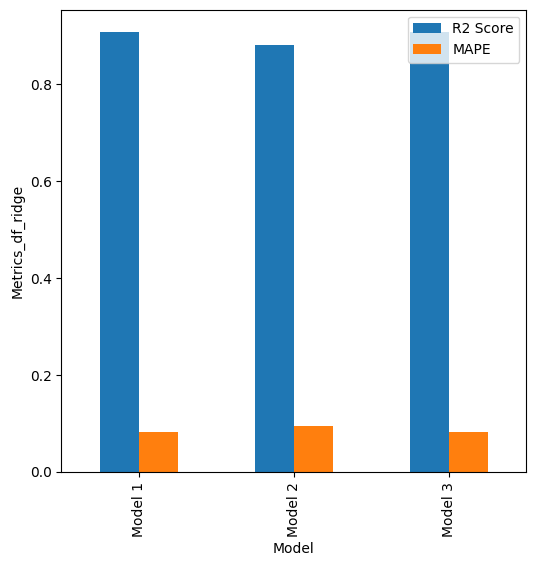

In [174]:
#comapre the r2 score of ridge and lasso

fig, ax = plt.subplots(figsize=(6, 6))

metrics_df_ridge.plot(kind='bar', x='Model', y=['R2 Score', 'MAPE'], ax=ax)

ax.set_xlabel('Model')
ax.set_ylabel('Metrics_df_ridge')

plt.show()

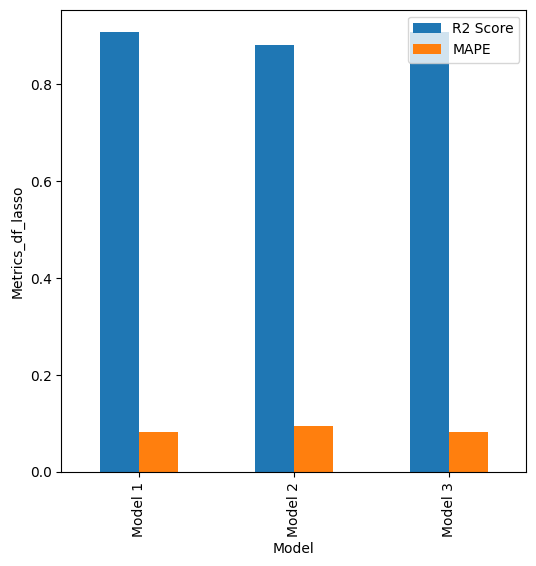

In [175]:
fig, ax = plt.subplots(figsize=(6, 6))

metrics_df_ridge.plot(kind='bar', x='Model', y=['R2 Score', 'MAPE'], ax=ax)

ax.set_xlabel('Model')
ax.set_ylabel('Metrics_df_lasso')

plt.show()

 __<h1>Conclusion:</h2>__

 1. From the comparison of regression models, __MODEL 1__ has better r2 value __0.9085__ and hence better performance than the other two.
 2. Even after Ridge and Lasso regression the __Model 1__ outperforms other two models with a r2 score of __0.9087__ 
 3. Hence the Model with all the variables has outperformed the other two models